In [583]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [584]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [585]:
#per capita crime rate by town = CRIM
#proportion of residential land zoned for lots over 25,000 sq.ft. = ZN
#proportion of non-retail business acres per town = INDUS
#Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) = CHAS
#nitric oxides concentration (parts per 10 million) = NOX
#average number of rooms per dwelling = RM
#proportion of owner-occupied units built prior to 1940 = AGE
#weighted distances to five Boston employment centres = DIS
#index of accessibility to radial highways = RAD
#full-value property-tax rate per $10,000 = TAX
#pupil-teacher ratio by town = PTRATIO
#B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town = B
#%lower status of the population = LSTAT
#Median value of owner-occupied homes in $1000's = MEDV

Target Variable = MEDV. <br>
Rest columns = Features

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


No Null values 

In [587]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [588]:
y = df['MEDV']                       #target variable
X = df.drop(columns ='MEDV')         #features

# Correlation Matrix

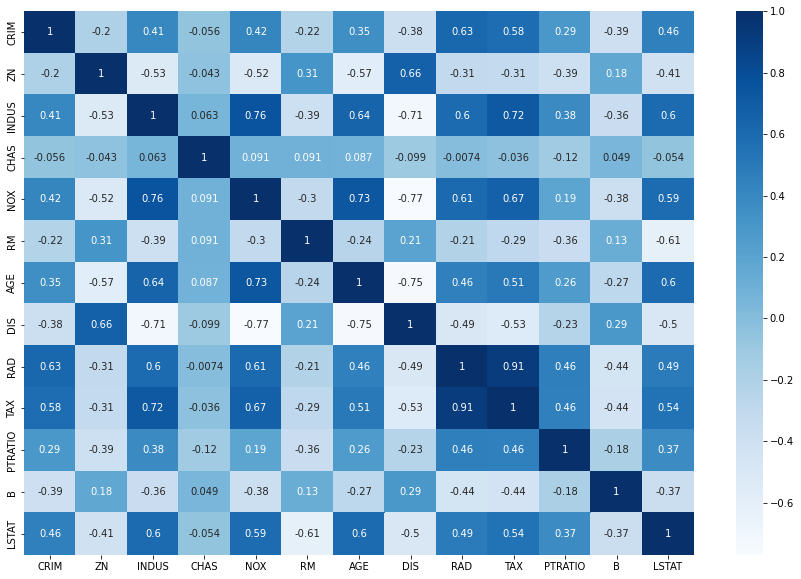

In [589]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),cmap='Blues',annot=True)

Highly correlated: <br>

*   NOX/INDUS 
*   TAX/INDUS 
*   TAX/RAD
*   NOX/AGE
*   NOX/DIS
*   AGE/DIS










*Removing correlated variables*

In [590]:
X = X.drop(columns = ['NOX', 'INDUS', 'DIS', 'RAD'])
X.head()

,CRIM,ZN,CHAS,RM,AGE,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0,6.575,65.2,296.0,15.3,396.90,4.98
1,0.02731,0.0,0,6.421,78.9,242.0,17.8,396.90,9.14
2,0.02729,0.0,0,7.185,61.1,242.0,17.8,392.83,4.03
3,0.03237,0.0,0,6.998,45.8,222.0,18.7,394.63,2.94
4,0.06905,0.0,0,7.147,54.2,222.0,18.7,396.90,5.33


In [591]:
#Linear regression
#SVM
#forest classifier
#Ridge regression
#lasso regression

In [592]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Splitting the data into train, cross-validation set and test set.

In [593]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1)

# **Linear Regression Model**

In [594]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train)
print( 'The accuracy score on CV set is: '  + str((lin_reg.score(X_valid, y_valid))*100) +'%') #crossvalidation
print( 'The accuracy score on training set is: ' + str((lin_reg.score(X_train, y_train))*100)+'%') #training set

The accuracy score on CV set is: 67.06757878374768%
The accuracy score on training set is: 68.54708407440818%


# *Conclusion*
Applying Linear regression on CV and training set gave approximately same low accuracy score which suggests that the model is greatly underfitting the data. Hence we need to move to other algorithms which use non-linear classification.

In [595]:
# from sklearn.preprocessing import PolynomialFeatures
# sc = StandardScaler()
# X_scaled = sc.fit_transform(X_train)
# X_scaled.shape
# poly_features = PolynomialFeatures(degree=4, include_bias=False)
# X_poly = poly_features.fit_transform(X_scaled)
# lin_reg = LinearRegression()
# lin_reg.fit(X_poly, y_train)
# X_scaled_valid = sc.fit_transform(X_valid)
# oly_features = PolynomialFeatures(degree=4, include_bias=False)
# X_pol = oly_features.fit_transform(X_scaled_valid)
# lin_reg.score(X_pol, y_valid)

Just checking out the ridge regression model, according to the theory it shouldn't work since model is already underfitted by the linear regression

In [596]:
from sklearn.linear_model import Ridge
pipe = make_pipeline(StandardScaler(), Ridge(alpha=1, solver="cholesky"))
pipe.fit(X_train, y_train)
print( 'The accuracy score on CV set is: '  + str((pipe.score(X_valid, y_valid))*100) +'%')

The accuracy score on CV set is: 67.07108041352978%


# **Random Forest**

In [597]:
from sklearn.ensemble import RandomForestRegressor
rf = make_pipeline(StandardScaler(), RandomForestRegressor())
rf.fit(X_train, y_train)
print( 'The accuracy score on training set is: ' + str((rf.score(X_train, y_train))*100)+'%')
print( 'The accuracy score on CV set is: '  + str((rf.score(X_valid, y_valid))*100) +'%')
print('The accuracy score on test set is: ' + str((rf.score(X_test, y_test))*100)+'%')

The accuracy score on training set is: 97.79036982241901%
The accuracy score on CV set is: 90.34214499548906%
The accuracy score on test set is: 88.12964767469853%


# *Conclusion*
It might be slightly overfitting since training set has almost 10% higher accuray than CV and test set.

# **Decision Tree**

In [598]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=7))
tree_reg.fit(X_train, y_train)
print( 'The accuracy score on training set is: ' + str((tree_reg.score(X_train, y_train))*100)+'%')
print( 'The accuracy score on CV set is: '  + str((tree_reg.score(X_valid, y_valid))*100) +'%')
print('The accuracy score on test set is: ' + str((tree_reg.score(X_test, y_test))*100)+'%')

The accuracy score on training set is: 96.40859028584119%
The accuracy score on CV set is: 78.67570642750653%
The accuracy score on test set is: 87.21973942290997%


# *Conclusion*
Need to tweak the hyperparameters using GridSearchCV for maximising accuracy of CV set. It's too diverging wrt to training set

In [599]:
from sklearn.model_selection import GridSearchCV

In [600]:
classifier = DecisionTreeRegressor()
params = [
              {'max_depth': [2,3,4,5,6,7,8]}
             ]
gs = GridSearchCV(estimator = classifier,
                           param_grid = params,
                           scoring = 'r2',
                           refit = 'r2',
                           cv = 5
                           )
gs = gs.fit(X_valid, y_valid)
print(gs.best_score_)
best = gs.best_params_
print(gs.best_params_)

0.4133347638671391
{'max_depth': 4}


In [601]:
tree_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=best['max_depth']))
tree_reg.fit(X_train, y_train)
print( 'The accuracy score on training set is: ' + str((tree_reg.score(X_train, y_train))*100)+'%')
print( 'The accuracy score on CV set is: '  + str((tree_reg.score(X_valid, y_valid))*100) +'%')
print('The accuracy score on test set is: ' + str((tree_reg.score(X_test, y_test))*100)+'%')

The accuracy score on training set is: 87.24928721736752%
The accuracy score on CV set is: 77.85621989687051%
The accuracy score on test set is: 88.87778570676721%


# *Conclusion*
The accuracy scores of all sets are more close now indicating less overfitting of training set

# **Support Vector Machine**

In [602]:
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=70, epsilon=0.0))
regr.fit(X_train, y_train)
print( 'The accuracy score on training set is: ' + str((regr.score(X_train, y_train))*100)+'%')
print( 'The accuracy score on CV set is: '  + str((regr.score(X_valid, y_valid))*100) +'%')
print('The accuracy score on test set is: ' + str((regr.score(X_test, y_test))*100)+'%')

The accuracy score on training set is: 92.69833957061482%
The accuracy score on CV set is: 92.60764465048537%
The accuracy score on test set is: 89.10977476341047%


# *Conclusion*
The accuracy scores of all sets are near to each other indicating good fit. Need to tweak the hyperparameters using GridSearchCV for maximising accuracy

# Tuning Hyperparameters

In [607]:
classifier = SVR()
parameters = [
              {'C': [60, 70, 80], 'kernel': ['rbf'], 'epsilon':[0.0,0.1,0.2], 'gamma':[0.1,0.2,0.3]}
              ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_root_mean_squared_error',
                           refit = 'neg_root_mean_squared_error',
                           cv = 5
                           )
grid_search = grid_search.fit(X_valid, y_valid)
print(grid_search.best_score_)
b = grid_search.best_params_
print(grid_search.best_params_)

-8.952318760006058
{'C': 60, 'epsilon': 0.0, 'gamma': 0.1, 'kernel': 'rbf'}


Using the paramters obtained from GridSearchCV into the Support vector machine:

In [608]:
regr = make_pipeline(StandardScaler(), SVR(C = b['C'], epsilon = b['epsilon'], gamma = b['gamma'], kernel = b['kernel']))
regr.fit(X_train, y_train)
print( 'The accuracy score on training set is: ' + str((regr.score(X_train, y_train))*100)+'%')
print( 'The accuracy score on CV set is: '  + str((regr.score(X_valid, y_valid))*100) +'%')
print('The accuracy score on test set is: ' + str((regr.score(X_test, y_test))*100)+'%')

The accuracy score on training set is: 91.42427159404495%
The accuracy score on CV set is: 92.20631287124682%
The accuracy score on test set is: 90.04129316870062%


We see almost a 1% improvement in accuray in test set